In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('zoo.csv')

In [3]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data['type'].value_counts()
# This shows that this is a imbalanced multi class dataset, hence will use 
# 1. stratify while splitting
# 2. the averaging method = macro [airthmetic mean] as all animal types (classes) are equally important

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [5]:
data.drop(['animal name'],axis=1, inplace=True)
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
## Splitting the dataset

X = data.iloc[:, :-1]

y = data.iloc[:, -1]

In [7]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.25)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

k_metrics = {}

In [25]:
def score_list(K):
    for i in K:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)
        test_predict = model.predict(X_test)    
        #f1 = f1_score(y_test, test_predict, average='macro')
        #error = 1-f1
        testing_score = model.score(X_test, y_test)
        training_score = model.score(X_train, y_train)
        k_metrics.update({i:(np.round(testing_score,2), np.round(training_score,2))})        
    return k_metrics


In [26]:
import numpy as np
K_range = np.array(range(1,31))

K_metrics = score_list(K_range)

k_metrics

{1: (0.96, 1.0),
 2: (0.96, 0.97),
 3: (0.88, 0.97),
 4: (0.85, 0.91),
 5: (0.81, 0.87),
 6: (0.81, 0.85),
 7: (0.81, 0.89),
 8: (0.77, 0.84),
 9: (0.73, 0.8),
 10: (0.73, 0.8),
 11: (0.73, 0.8),
 12: (0.73, 0.8),
 13: (0.73, 0.8),
 14: (0.73, 0.8),
 15: (0.73, 0.8),
 16: (0.73, 0.8),
 17: (0.73, 0.8),
 18: (0.73, 0.8),
 19: (0.73, 0.8),
 20: (0.73, 0.77),
 21: (0.69, 0.76),
 22: (0.65, 0.72),
 23: (0.65, 0.72),
 24: (0.65, 0.72),
 25: (0.65, 0.72),
 26: (0.62, 0.65),
 27: (0.54, 0.59),
 28: (0.54, 0.59),
 29: (0.54, 0.59),
 30: (0.54, 0.59)}

In [28]:
df_metrics = pd.DataFrame(K_metrics, index = ['testing_score', 'training_score']).T
df_metrics.head()

,testing_score,training_score
1,0.96,1.00
2,0.96,0.97
3,0.88,0.97
4,0.85,0.91
5,0.81,0.87


In [29]:
df_metrics.sort_values(['testing_score'], ascending=False).head()

,testing_score,training_score
1,0.96,1.00
2,0.96,0.97
3,0.88,0.97
4,0.85,0.91
5,0.81,0.87


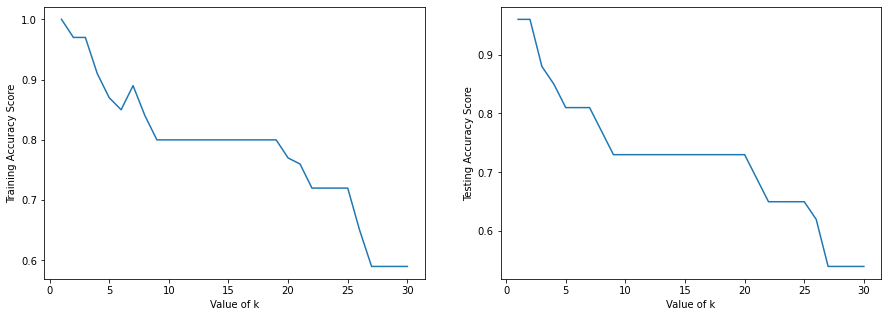

In [31]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(df_metrics.index, df_metrics['training_score'])
ax[0].set_xlabel('Value of k')
ax[0].set_ylabel('Training Accuracy Score')

ax[1].plot(df_metrics.index, df_metrics['testing_score'])
ax[1].set_xlabel('Value of k')
ax[1].set_ylabel('Testing Accuracy Score')

plt.show()

### Why both testing and training results showing the similar pattern ? 

### Trying to do the same with GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV, cross_val_score

model = KNeighborsClassifier()
grid = dict(n_neighbors= np.array(range(1,31)))

grid_model = GridSearchCV(model, grid, scoring= 'f1_macro', cv=4)
grid_model.fit(X, y)

grid_model.best_params_

{'n_neighbors': 1}

In [15]:
grid_model.cv_results_

{'mean_fit_time': array([0.00087714, 0.00376588, 0.0017488 , 0.00024652, 0.00087881,
        0.00391603, 0.00389498, 0.        , 0.00390524, 0.00391537,
        0.00038749, 0.00549394, 0.00172961, 0.0009926 , 0.00102025,
        0.00100321, 0.00148082, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00038832, 0.00363415, 0.00390631,
        0.00391328, 0.        , 0.        , 0.        , 0.        ]),
 'std_fit_time': array([8.84514581e-04, 5.38705264e-03, 4.42114036e-04, 4.26993498e-04,
        1.52214510e-03, 6.78275454e-03, 6.74631143e-03, 0.00000000e+00,
        6.76406842e-03, 6.78161892e-03, 6.71152014e-04, 6.41302823e-03,
        8.24818395e-04, 6.17447735e-06, 1.02105803e-03, 2.02082602e-05,
        4.89339337e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.72597349e-04, 6.29454075e-03,
        6.76592671e-03, 6.77800558e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 'mean_scor

In [33]:
grid_model.best_params_

{'n_neighbors': 1}

In [34]:
grid_model.best_score_

0.9210884353741495

In [32]:
grid_model.cv_results_['mean_test_score']

array([0.92108844, 0.78962585, 0.76873583, 0.71159297, 0.72698413,
       0.69296157, 0.64849773, 0.5307952 , 0.49338023, 0.48623737,
       0.48623737, 0.48623737, 0.48482574, 0.48482574, 0.48482574,
       0.48482574, 0.48482574, 0.48482574, 0.49394757, 0.45079977,
       0.3944686 , 0.35626984, 0.35626984, 0.35626984, 0.35626984,
       0.35625438, 0.31996032, 0.2885235 , 0.23464286, 0.22134158])

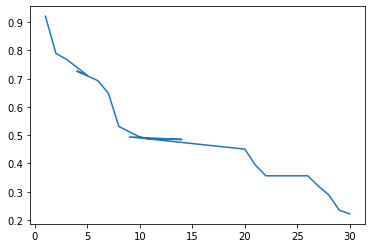

In [17]:
plt.plot(grid_model.cv_results_['rank_test_score'], grid_model.cv_results_['mean_test_score'])
plt.show()

## In both ways, only n_neighbours = 1 is giving the best score. 